# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset

indices = [85, 154, 6]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,622,55,137,75,7,8
2,12126,3199,6975,480,3140,545


In [4]:
total = samples.sum(axis=1)
total = total.rename('total')
total.describe()

count         3.000000
mean      75753.333333
std      108263.388984
min         904.000000
25%       13684.500000
50%       26465.000000
75%      113178.000000
max      199891.000000
Name: total, dtype: float64

In [5]:
df = pd.concat([samples, total], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,16117,46197,92780,1026,40827,2944,199891
1,622,55,137,75,7,8,904
2,12126,3199,6975,480,3140,545,26465


In [6]:
percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]

In [7]:
df = data.rank(pct=True)

In [8]:
total = df.sum(axis=1)
total = total.rename('total')
df = pd.concat([df, total], axis=1)

In [9]:
rank = 100*df.rank(pct=True)
rank.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,66.363636,83.863636,65.000000,7.500000,68.181818,62.954545,69.772727
1,44.090909,84.772727,71.818182,54.545455,70.454545,74.090909,81.136364
2,41.590909,82.045455,65.909091,63.636364,72.272727,98.863636,88.181818
3,67.727273,18.750000,46.590909,87.954545,40.681818,74.772727,65.227273
4,85.681818,64.772727,63.636364,77.500000,62.954545,96.818182,92.954545


In [10]:
print rank.idxmax(), rank.idxmin()

Fresh               181
Milk                 86
Grocery              85
Frozen              325
Detergents_Paper     85
Delicatessen        183
total                47
dtype: int64 Fresh                95
Milk                154
Grocery              75
Frozen              420
Detergents_Paper     75
Delicatessen        109
total               154
dtype: int64


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 

I have chosen three customers based on their toal purchase cost, to be minium, maximum and around standard deviation. The cusotmer spent $$904 has an average of $2.5 food purchase per day. The customer who spent $26465 has an average daily purchase cost of $73. The customer who spent $199891 has an average daily purchase cost of $548.

In addition, by comparing each product purchase history in three samples with statistical description, I found sample 1 has obvious low purchase tendency in Frozen, and its $$1026 cost in Frozen is about only 1/3 of Frozen mean. Also it is about $500 below its 50th percentile $1526, while all other products cost are much higher than its mean in statistical description, especially it has $40827 cost in Detergents Paper and $92780 in Grocery which are the maximum one can get in Detergents Paper and Grocery. What I can conclude from it is that sample 1 might very much be a big sized establishment that do not buy Frozen food but large amount of Detergents Paper, Milk and Grocery. I can think of it as something like supermarket or retailer.

In the same way, I can say sample 3 is very much a like sample 1 only in smaller size. By comparing its products purchase history, I found all its costs are similar to the means in statistical description, but its Frozen cost $$480 is even less than 25th percentile $742. This is a good indicator that says sample 3 and 1 are much alike only differ in size. So I would say sample 3 is something like a small grocery store.

Finally, sample 2 is an outlier and will not be considered as an establishment. By comparing each categories, I can say it does not have similar buying power as the others and would much likely be an individual buyer.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Delicatessen', axis=1)
label = data['Delicatessen']

scores = []

for i in range(100):
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, label, test_size=0.25)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)



    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    scores.append(score)
    
print np.mean(scores)

-2.83925582848


In [12]:
from sklearn.cross_validation import cross_val_score
new_data = data.drop('Frozen', axis=1)
label = data['Frozen']

regressor = DecisionTreeRegressor()
scores = cross_val_score(regressor, new_data, label, scoring='r2', cv=10)

print np.mean(scores)

-5.40494787668


In [13]:
new_data = data.drop('Fresh', axis=1)
label = data['Fresh']

regressor = DecisionTreeRegressor()
scores = cross_val_score(regressor, new_data, label, scoring='r2', cv=10)

print np.mean(scores)

-0.907672699779


In [14]:
new_data = data.drop('Milk', axis=1)
label = data['Milk']

regressor = DecisionTreeRegressor()
scores = cross_val_score(regressor, new_data, label, scoring='r2', cv=10)

print np.mean(scores)

0.0918721050549


In [15]:
new_data = data.drop('Grocery', axis=1)
label = data['Grocery']

regressor = DecisionTreeRegressor()
scores = cross_val_score(regressor, new_data, label, scoring='r2', cv=10)

print np.mean(scores)

0.614830208676


In [16]:
new_data = data.drop('Detergents_Paper', axis=1)
label = data['Detergents_Paper']


regressor = DecisionTreeRegressor()
scores = cross_val_score(regressor, new_data, label, scoring='r2', cv=10)

print np.mean(scores)

0.580735904694


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 

I tested all 6 features and found the following:
The result of R^2 being negative is not a good indicator that all other purchased categories can rely on to predict Deli in a linear regression. It is because the fit model performs even worse than the horizontal line where Deli mean lies: the regressor's 'sum of squared errors' is larger than that of the mean.

Because Deli has is not positively correlated to other products, it is useless in identifying customer spending habits. As a result I tested all other 5 products and found Milk, Grocery and Detergents_Paper all have positive correlation, and they would be the best to identify customers spending habits. 

Note also Detergents_Paper and Grocery have the even more positive correlation than Milk.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

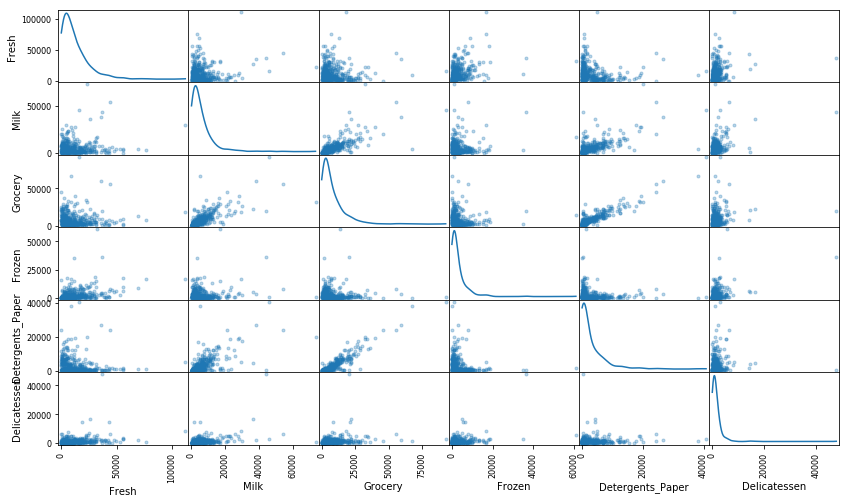

In [17]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The graph confirms that Delicatessen is not  correlated to other categories. It can be seen that the Milk is more positively correlated to Detergents_Paper and Grocery. It can also be seen that the data is not normally distributed as it has more density near zero and it is positively skewed accross all x-axis.

Note the plot can be confirmed from Question 2 as Milk, Detergents_Paper and Grocery has positive R^2 scores and Detergents_Paper and Grocery are more positively correlated than Milk.

As you can see from the plot, Delicatessen, Fresh and Frozen are not correlated to each other and other products and the shape is condensed around corner, unlike Grocery, Milk and Detergents_Paper have the form of ellipse or slope.

In [18]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

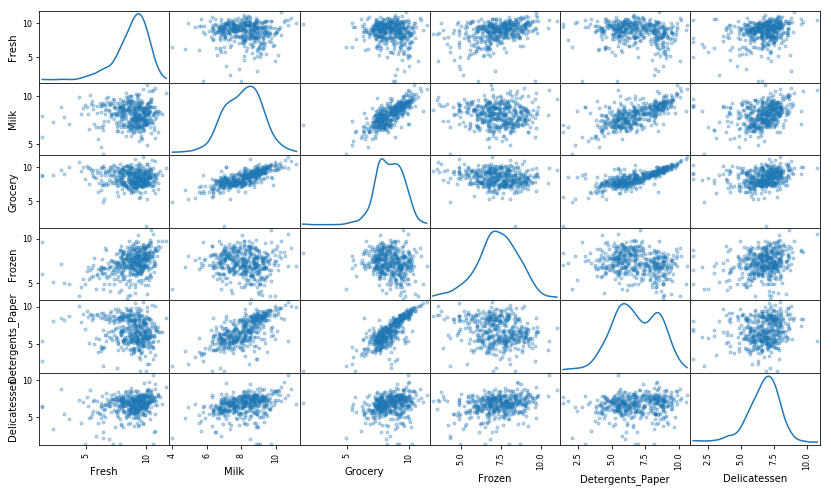

In [19]:
# TODO: Scale the data using the natural logarithm
log_data = data.applymap(lambda x: np.log(x + 1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.applymap(lambda x: np.log(x + 1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [20]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687692,10.740692,11.437997,6.934397,10.617123,7.987864
1,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
2,9.403190,8.070906,8.850231,6.175867,8.052296,6.302619


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [21]:
from collections import Counter
li=[]

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    df = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    li.append(df.index.values)
    
    
# OPTIONAL: Select the indices for data points you wish to remove


outliers=[]
for i in li:
    for j in i:
        outliers.append(j)

print Counter(outliers)

# outliers = list(set(outliers))
outliers = [154, 128, 65, 66, 75]

# print outliers
# # Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


Counter({154: 3, 128: 2, 65: 2, 66: 2, 75: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1})


In [22]:
print len(outliers)
good_data.shape

5


(435, 6)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there are data points considered outliers for more than one feature. For example, data index 154 is in Delicatessen, Grocery and Milk and it is indeed outlier that needs to be removed from the dataset. However, I believe that only outliers in repeating features shall be removed. It had 42 outliers, if I remove all of them, it will reduce the representativeness fo the original dataset: reducing explained variance ratios and thus true covariances and correlations of the original dataset and its principle components. 

In addition, reducing number data points will distort supposed normal distribution, according to Central Limit Theorem, because the less number of trails of generating records the less extent to which normal distribution will be approximated, making skewed distortion.



The outliers that appeared more than one feature are: 
 65: 2,
 66: 2,
 75: 2,
 128: 2,
 154: 3

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

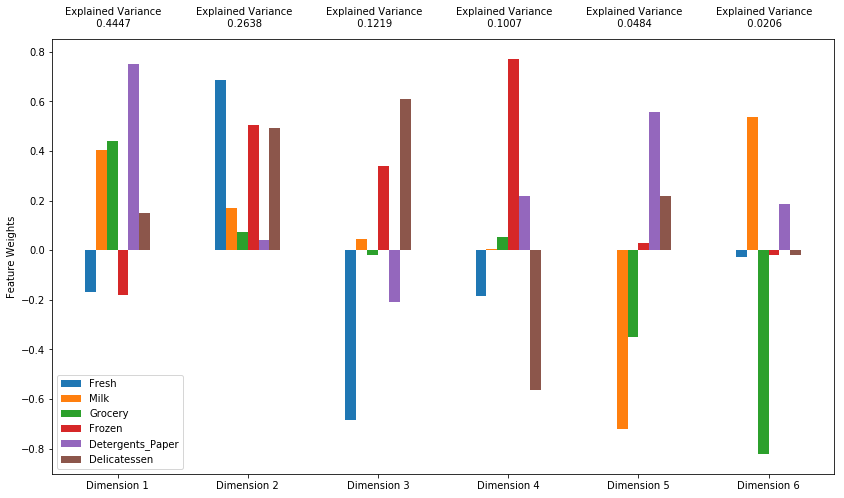

In [23]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [24]:
pca.explained_variance_ratio_

array([ 0.44465231,  0.26384572,  0.12185114,  0.10073867,  0.0483576 ,
        0.02055455])

In [25]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4447
Dimension 2    0.7085
Dimension 3    0.8304
Dimension 4    0.9311
Dimension 5    0.9795
Dimension 6    1.0001
Name: Explained Variance, dtype: float64


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The frist and second PC have total of 71% variance explained by principal components. The first four PC have 93% variance explained by principal components. The 1st PC represents a retailer buying pattern that does not buy Fresh and Frozen but a lot of Detergents Paper. The 2nd PC represents a restaurant buying pattern for a lot of Fresh, Frozen and Deli but much less Milk, Grocery and Detergents Paper. The 3rd PC captures the most variance in Fresh and Detergent Paper and the 4th PC captures in Frozen and Detergents Paper, so individual household would be proper in this term. 

My thoughs are the following. Because 1st PC has most weight in Detergents Paper (about 0.79), it might as well represent Detergents Paper in general, meaning if you see a data point in the right most biplot, it will buy lots of Detergents Paper. Vise versa, if you see the data point in the left most biplot, it will not likely buy Detergetns paper, but only portions of Fresh and Frozen. Similary, 2nd PC has most weight in Fresh (about 0.75) and it can represent Fresh, meaning if you see the data point in the upper most biplot, it will buy lots of Fresh. Vise versa, if you see the data point in the lower most biplot, it will not likely to buy Fresh and other products. 

That being said, I can use 1st PC to seperate dataset into two groups, those buying lots of Detergents Paper, as retailers, and those not buying Detergents Paper as restaurants. Similarly I can also use 2nd PC to seperate dataset into groups, those buying lots of Fresh, and those not buying Fresh at all. But both retailer/supermarket and restaurants/cafe can supply lots of Fresh, and 2nd PC is not as widely spread as 1st PC, it may have overlaps between different clusters buying habits more often than 1st PC, thus it might not serve as a distinctive group seperating indicator as 1st PC.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [26]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.3258,1.8893,-0.7043,-0.1863,-0.5288,-0.3767
1,-6.4868,-6.4785,-1.3047,-0.5908,0.4830,0.0336
2,1.1235,-0.2692,-1.3349,-0.4876,0.4810,-0.1062


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [27]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,5.3258,1.8893
1,-6.4868,-6.4785
2,1.1235,-0.2692


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

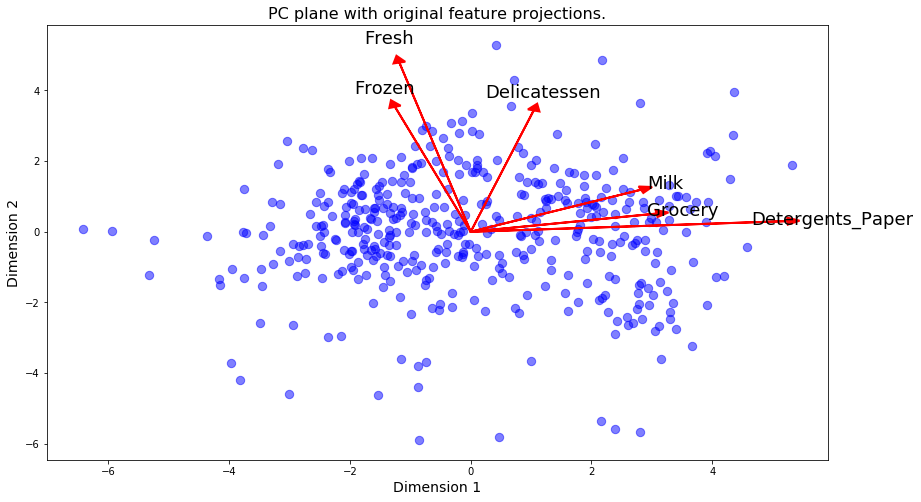

In [29]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

#### Answer: 

From the biplot, I can tell Detergents_Paper, Grocery and Milk are strongly correlated with the 1st PC. And Fresh and Frozen are strongly correlated with the 2nd PC. Delicatessen is  correlated to both 1st PC and weakly correlated to 2nd PC. It agrees with pca_results.

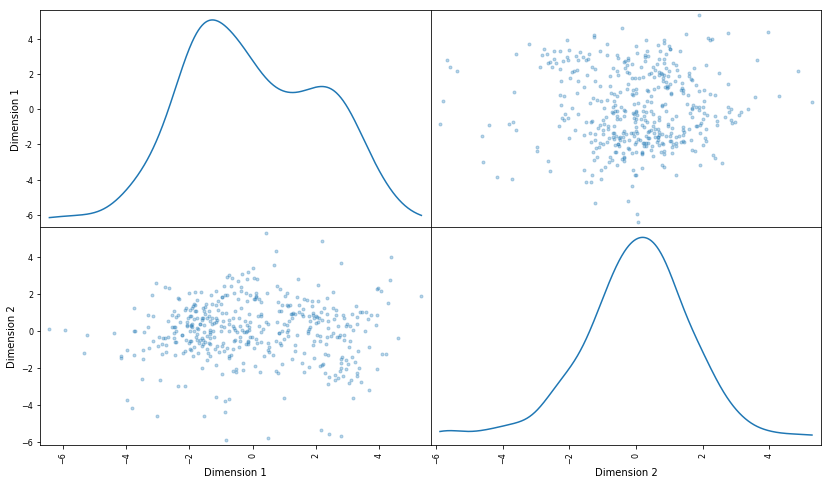

In [30]:
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Gaussian Mixture Model (GMM) is a generative and probabilistic mehod which of course assumes normal distributions among the dataset. Mixture means it can incorporate multi-dimensional normal distributions and add them together for overall convinience of distinguishing probabilities between different data points. It is mainly used to describe probabilistic distributions among data points and generate new data points (information) within learnt distributions. With the aid from Expectation Maximizaiton method, the algorithm steps through and assigns each data points to every normal distribuions and calculates chances as to where the particular data point is expected to fall given prior assumption about the normal distribtuion. It then update mean, variance and prior knowledge for each distributions. The algorithm then reiterate same steps unitll convergence is reached and distributions are set (mean and variance are no longer changing). The advantage of GMM is that it can calculate probabilities for dataset that is in the form of ellipse instead of circle which is huge convinience for positively and negatively correlated dimensions. Note also the GMM is soft clustering because each data points will have portions of possibilities (uncertainty) for every distributions/clusters present.

K-Means model is a arithmetic model that finds mean (centroid) of unlabeled dataset. If the dataset is spread in every directions, it will be in the form of a circle and the will be the center of the circle. K-Means is such a method that it can relate each data points to supposed centroid and find and update where its overall Eucledian-distances between them will be minimum. The disadvantage of K-Means is that it needs people to assumme pre-determined number of clusters and will not learn number of clusters through optimization. However K-Means is much simpler to calculate through Expectation Maximization (because it only considers data points within nearest centroid instead of all dataset) and thus takes less computational time than GMM. The K-Means is hard clusterting becaust it has 100% certainty about what cluster the data points belong to. Also note that K-Means does not necessarily assume normal distribution because it does not need to compute probability but arithmetic centroid. However, it will do no harm to normalize/standardize the dataset such that no single dimension will unfairly dominate and distort multi-variate distribution.

As you can see in the biplot, I can say that the reduced dataset seems overlaping each other in the middle, and is not easily seperated by linear desicion boundary. So I will choose GMM for this case.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [52]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
import numpy as np

# TODO: Apply your clustering algorithm of choice to the reduced data 
# clusterer = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=0).fit(reduced_data)
clusterer = GMM(n_components=2, n_init=10, n_iter=300, random_state=7).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
# centers = clusterer.cluster_centers_
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, random_state=7)

In [53]:
print score

0.41361172554


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

n_cluster = 2: 0.41

n_cluster = 3: 0.37

n_cluster = 4: 0.33

n_cluster = 5: 0.29

n_cluster = 6: 0.27

n_cluster = 7: 0.29

I found setting 2 clusters has the highest silhouette score to be 41%.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

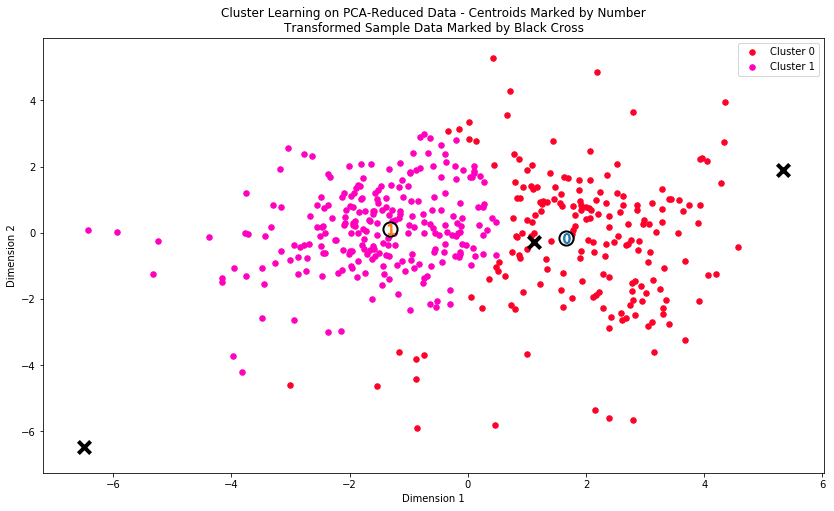

In [34]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [54]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4349.0,6419.0,9657.0,1040.0,3091.0,958.0
Segment 1,8792.0,2035.0,2666.0,2058.0,336.0,711.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Obviously by the clustering graph, it is very clear that segment 0 is grocer in general, and segment 1 is restaurant. According to statistical description, segment 1 has all costs lower than means, especially its Detergents Paper cost $$336 is slightly higher than its 25th percentile $256. This suggets that it should belong to restaurant/cafe which has less buying power and less likely to buy Detergents Paper than retailer/grocer/supermarket which has increasing buying tendency in Detergents Paper. On the biplot you can see also that on the right is grocer and on the left is restaurant and it is in accordance with the Explained Variance graph earlier whose most varied/spread 1st PC has an indicator Detergents Paper as the most representative feature. If I use the 1st PC as a scale to seperate clusters, I will make a decision boundary at the middle of 1st PC at 0, above it would be grocer and below it would be restaurant.  


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [37]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [38]:
sample_preds

array([0, 0, 0])

**Answer:**

Both sample point 0 and 2 are within cluster 0. It makes sense that point 0 is even further away than point 2 on first principal component score, suggesting that point 0 is much bigger grocer capacity than point 2, in terms of buying a lot more detergent papars and groceries. While point 2 is bit smaller in size than point 0 but still within the same cluster as grocer group. Most of the cluster 0 is distributed near cluster 1 so they are alike to some extent (may be they are both business establishment only differ in size of certain product like Detergetns Paper). I would argue the cluster 1 falls a bit low on PC1 but holds the same spread of data points on PC2 and it suggests that cluster 1 buys less Detergents Paper and Grocery than cluster 0 but buys about the same amount of Fresh and Frozen. So cluster 1 would be something like restaurant which buys little Detergents Paper in general.

The point 1 does not make sense to be within either cluster 0 or 1 as you can see in the graph above and it is an outlier. It has much less PC score in both PC1 and PC2, suggesting that it is not subject to cluster 1 or 0. The fact that point 1 is outlier suggests it has much less buying power and does not fall into either cluster 0 or 1 and would most likely be an individual buyer as an outlier.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

An A/B testing can be applied to find out how much customers like the new service. If I split hotel cluster into 90% and 10% the hotel population, I can put 90% hotel customers with default 5 days service and 10% hotel customers with testing 3 days service. Now I split retail cluster into 90% and 10% of the retail population and put 90% with default 5 days service and 10% with testing 3 days service. After I run testing abreast for some weeks long, I can compare the total coste on all products within each group (hotel and retailer) to see if they like the new service. If the total cost decreases in hotel testing group, it suggests that hotel customers might not like the new service, and distributor can stay with 5 days service for hotel customers. If total cost increases in hotel testing group, distributor can go with 3 days service with hotel customers. Similarly, I can compare expenses within retail default and testing group and decide if they like the new service. 

Also the metrics to determine customers acceptance of new service can be different, for example, number of complaints or number of quits.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

As hint, I can use supervised K-nearest neighbors learner to predict which cluster it will fall into. The target would resonably be segment 0 as restaurant and segment 1 as grocer. 

The original unlabeled dataset now is just feature engineered and labeled with segments. I can use this dataset to train KNeighborsClassifier with n_neighbors=2, then predict the new ten customers dataset their labels/customer segments. If I am lucky, I can also compute its classification accuracy when I happen to get their label information later to consider the effectiveness of the K-nearest neighbors.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

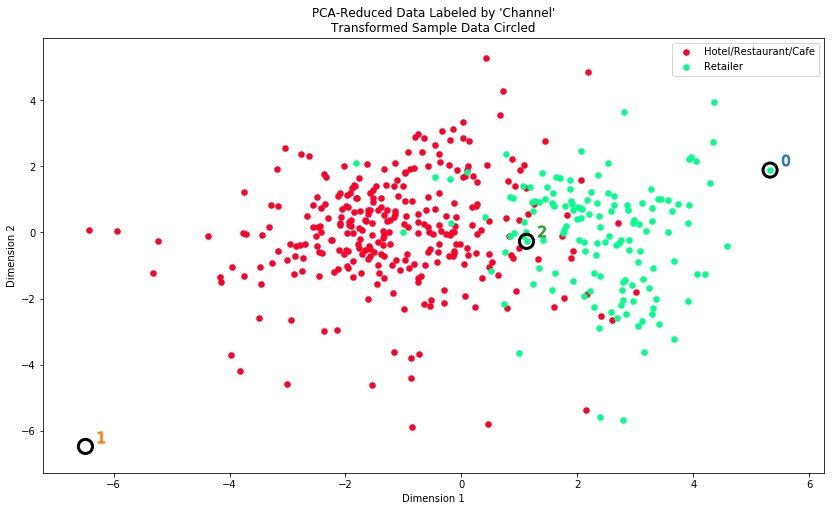

In [39]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustered distribution with 'channel' feature is very similar to clustering I used with 2 clusterings. The similarity is that my clusterings has indefinite boundary between them while the clusterings with 'channel' has data points from opposite cluster mixed in the present cluster. As a result the customer segments within 'channel' is not purely 'retailer' or 'restaurant' because of noises. In sum, the labeled dataset is very similar to my clusterings : cluster 1 as restaurant and cluster 0 as grocer and the clustering trained by GMM is not overfitting by the noises and robust in general.

I think GMM did pretty good job describing different distributions. If I can use some kernel trick like Gaussian Kernel, I possibily can even describe little noises inside each clusters.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.